In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from sunpy.time import TimeRange
import matplotlib.dates as mdates
import datetime as dt

import dask
import dask.array as da

%matplotlib notebook

/home/ofionnad/realta/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import dask.dataframe as dd

In [121]:
fname = 'udpoutput/cygA-1s-stokesI-notimedec_0_2020-10-13T17:47:00_ld'
sbs = np.arange(76, 197)
obs_mode = 3
trange = TimeRange("2020-10-13T17:47:00", 1.*u.second)
"""
fname = 'udpoutput/jupiter-stokesI_0_2020-10-13T17:47:00_19563125244140'
sbs = np.arange(76, 319)
obs_mode = 3
trange = TimeRange("2020-10-13T17:47:00", 10.*u.minute)
"""

xlabel = "Time"
ylabel = "Frequency (MHz)"
title = "Cyg A - Stokes I"

In [122]:
def sb_to_f(sbs, obs_mode):
    nyq_dict = {3:1, 5:2, 7:3}
    nyq_zone = nyq_dict[obs_mode]
    clock_dict = {3:200, 4:160, 5:200, 6:160, 7:200} #MHz
    clock = clock_dict[obs_mode]
    nu = (nyq_zone-1. + sbs/512.) * (clock/2.)
    return nu * u.MHz

In [123]:
def bg(data, amount=0.05):
        #tmp = data - np.mean(data, axis=0) 
        sdevs = np.mean(data, 1)
        cand = sorted(range(data.shape[0]), key=lambda y: sdevs[y])
        realcand = cand[:max(1, int(amount*len(cand)))]
        bg = np.mean(data[realcand, :], 0)
        return bg

In [124]:
#df = np.fromfile(fname, dtype=np.float32)
df = np.memmap(fname, np.float32, mode="c")

In [125]:
len(sbs)

121

In [126]:
freqs = sb_to_f(sbs, obs_mode)

In [127]:
print(min(freqs).value, max(freqs))

14.84375 38.28125 MHz


In [128]:
df = df.reshape(-1, sbs.shape[0]+1)
df = np.flip(df, axis=1)

In [129]:
df.shape

(195312, 122)

In [130]:
#sdf = df[::10,:]
##remove some strong rfi
for i in range(df.shape[1]):
    if 
sdf = df[:,:]

In [131]:
sdf.shape
#sdf = sdf[:,40:80]

(195312, 122)

In [132]:
#sfd = sdf/ bg(sdf)

In [133]:
x_lims = list(map(dt.datetime.fromtimestamp, [trange.start.unix, trange.end.unix]))
x_lims = mdates.date2num(x_lims)

<IPython.core.display.Javascript object>


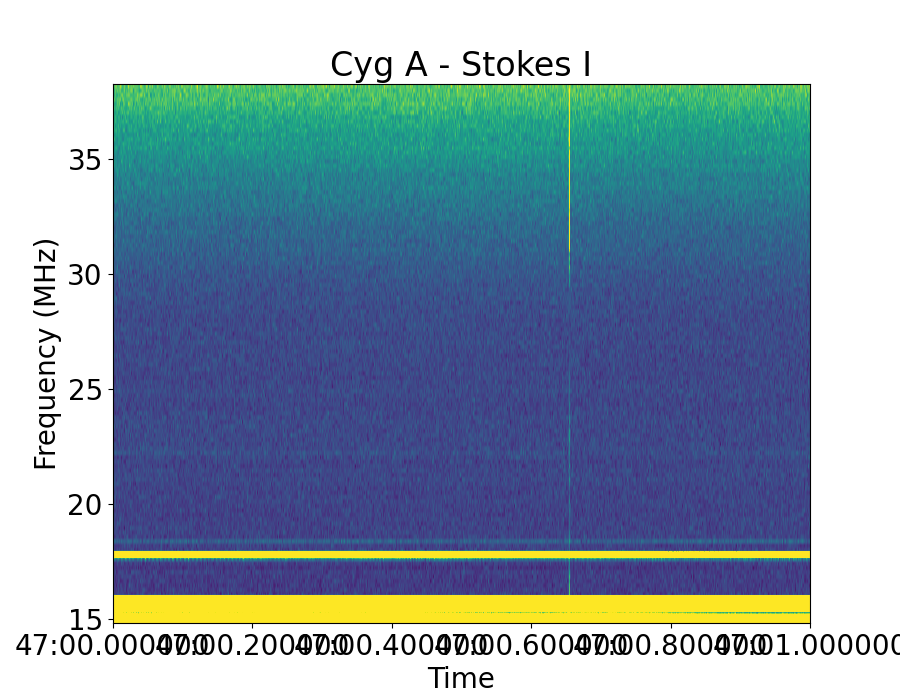

Text(0.5, 1.0, 'Cyg A - Stokes I')

In [173]:
plt.rcParams.update({'font.size': 20})
f, ax = plt.subplots(figsize=(9,7))
ax.imshow(sdf.T, aspect='auto', origin='lower',
           vmin=np.percentile(sdf.T, 40), 
           vmax=np.percentile(sdf.T, 80),
#           extent=[x_lims[0], x_lims[1], sb_to_f(116, 3).value, sb_to_f(156, 3).value])
           extent=[x_lims[0], x_lims[1], min(freqs).value, max(freqs).value])
ax.xaxis_date()
#xlabels = ax.get_xmajorticklabels()
#ax.set_xticklabels(xlabels, rotation=30)
ax.set_ylabel(ylabel)
ax.set_xlabel(xlabel)
ax.set_title(title)

In [120]:
#plt.savefig('jupiter_storm_zoom_.png')

[Text(18548.74096990741, 0, ''),
 Text(18548.740972222222, 0, ''),
 Text(18548.74097453704, 0, ''),
 Text(18548.740976851852, 0, ''),
 Text(18548.740979166665, 0, ''),
 Text(18548.740981481482, 0, ''),
 Text(18548.740983796295, 0, ''),
 Text(18548.740986111112, 0, '')]

In [149]:
import pyfftw
import time

In [202]:
subbands = [5,50]
a = sdf[:,[5,50]]
print("{} {}".format(sb_to_f(subbands[0]+sbs[0], obs_mode), sb_to_f(subbands[1]+sbs[0], obs_mode)))

15.8203125 MHz 24.609375 MHz


In [216]:
a = a.T

In [218]:
chunk_number = 100
filter_chunk = int(a.shape[1]/chunk_number)
fft_arr = np.zeros((a.shape[0], chunk_number, filter_chunk))
for j in range(a.shape[0]):
    for i in range(chunk_number):
        print(j, i, filter_chunk)
        fft_arr[j, i, :] = pyfftw.interfaces.numpy_fft.fft(a[j, i*filter_chunk:(i+1)*filter_chunk])

0 0 1953
0 1 1953
0 2 1953
0 3 1953
0 4 1953
0 5 1953
0 6 1953
0 7 1953
0 8 1953
0 9 1953
0 10 1953
0 11 1953
0 12 1953
0 13 1953
0 14 1953
0 15 1953
0 16 1953
0 17 1953
0 18 1953
0 19 1953
0 20 1953
0 21 1953
0 22 1953
0 23 1953
0 24 1953
0 25 1953
0 26 1953
0 27 1953
0 28 1953
0 29 1953
0 30 1953
0 31 1953
0 32 1953
0 33 1953
0 34 1953
0 35 1953
0 36 1953
0 37 1953
0 38 1953
0 39 1953
0 40 1953
0 41 1953
0 42 1953
0 43 1953
0 44 1953
0 45 1953
0 46 1953
0 47 1953
0 48 1953
0 49 1953
0 50 1953
0 51 1953
0 52 1953
0 53 1953
0 54 1953
0 55 1953
0 56 1953
0 57 1953
0 58 1953
0 59 1953
0 60 1953
0 61 1953
0 62 1953
0 63 1953
0 64 1953
0 65 1953
0 66 1953
0 67 1953
0 68 1953
0 69 1953
0 70 1953
0 71 1953
0 72 1953
0 73 1953
0 74 1953
0 75 1953
0 76 1953
0 77 1953
0 78 1953
0 79 1953
0 80 1953
0 81 1953
0 82 1953
0 83 1953
0 84 1953
0 85 1953
0 86 1953
0 87 1953
0 88 1953
0 89 1953
0 90 1953
0 91 1953
0 92 1953
0 93 1953
0 94 1953
0 95 1953
0 96 1953
0 97 1953
0 98 1953
0 99 1953
1 0 1953
1

<ipython-input-218-7d5208a0d0b6>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_arr[j, i, :] = pyfftw.interfaces.numpy_fft.fft(a[j, i*filter_chunk:(i+1)*filter_chunk])


In [219]:
fft_arr.shape

(2, 100, 1953)

<IPython.core.display.Javascript object>


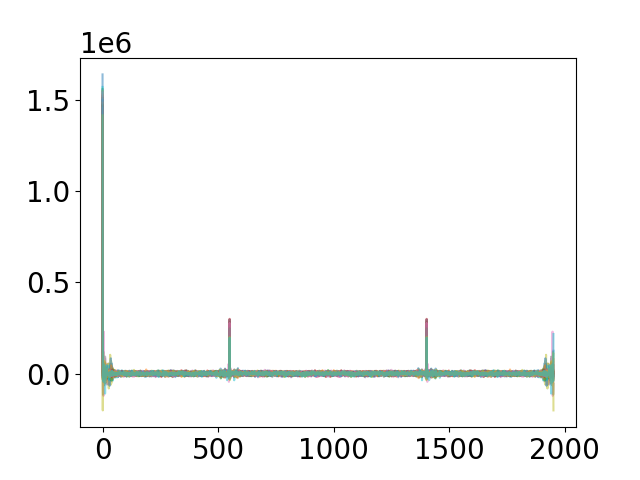

In [225]:
fig, ax = plt.subplots()
ax.plot(fft_arr[0,0:20,:].T, alpha=0.5)

<IPython.core.display.Javascript object>


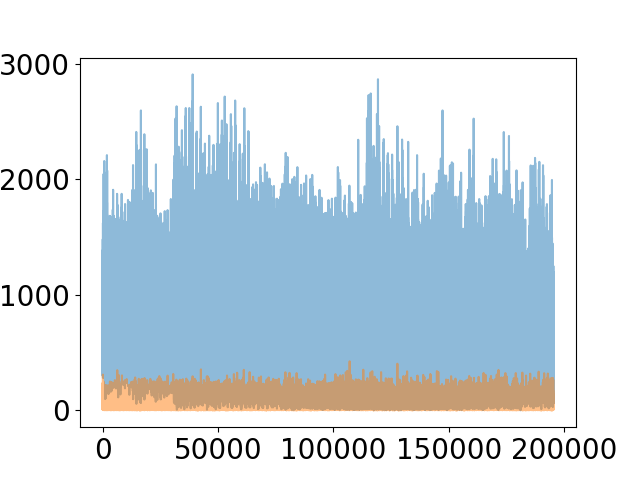

In [196]:
fig, ax = plt.subplots()
ax.plot(a, alpha=0.5)

In [213]:
start = time.time()
b = pyfftw.interfaces.numpy_fft.fft(a)
print(b.shape)
end = time.time() - start
print("Time for pyfftw: {}".format(end))

(195312, 2)
Time for pyfftw: 0.01059269905090332


<IPython.core.display.Javascript object>


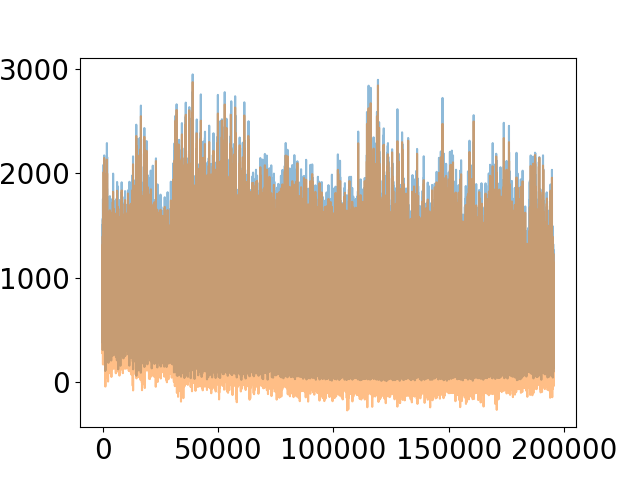

/home/ofionnad/realta/lib/python3.8/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [198]:
fig, ax = plt.subplots()
ax.plot(b, alpha=0.5)

In [199]:
start = time.time()
c = np.fft.fft(a)
end = time.time() - start
print("Time for numpy: {}".format(end))
np.allclose(b, c)

Time for numpy: 0.06883931159973145


True

<IPython.core.display.Javascript object>


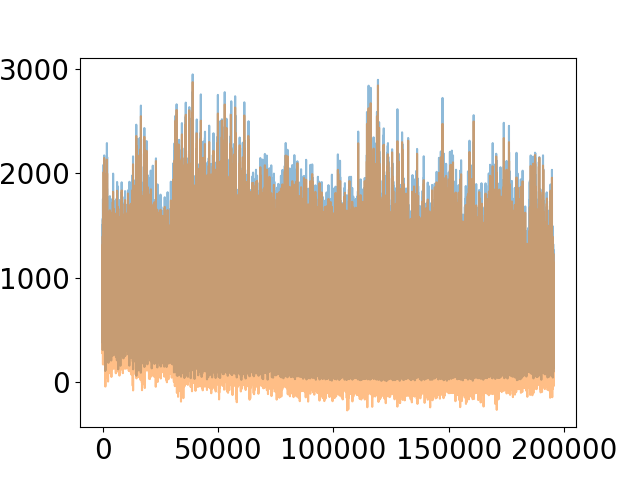

/home/ofionnad/realta/lib/python3.8/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [200]:
fig, ax = plt.subplots()
ax.plot(c, alpha=0.5)